In [5]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import encodings_solution_1, encodings_solution_2

In this notebook, you'll be working with the Pokémon dataset from the univariate plots lesson.

In [6]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

#### Make a scatter plot to show the relationship between three variables speed, defense and special-attack

- encoding with sizes: refer to "s" through a dictionary assigned to the "scatter_kws" parameter when working with `regplot`.
- if a numeric variable include negative values, then you might want to choose a color encoding instead.

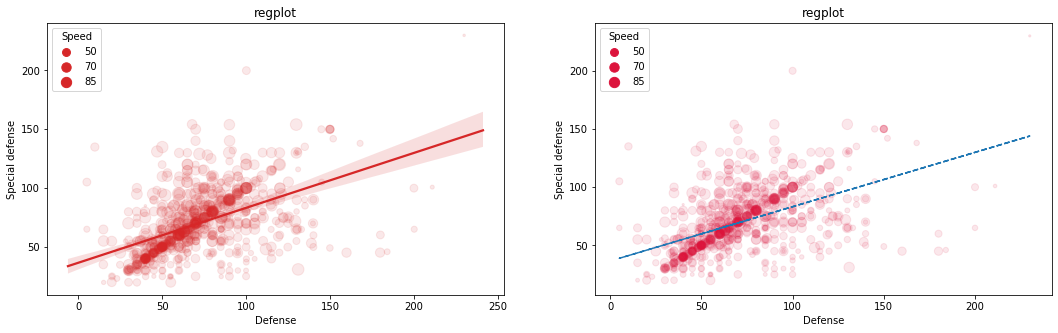

In [45]:
import numpy as np
from numpy.polynomial.polynomial import polyfit

plt.figure(figsize= [18,5])

plt.subplot(121)
base_color = sb.color_palette()[3]
sb.regplot(data = pokemon, x = 'defense', y = 'special-defense', color = base_color, x_jitter=0.2, y_jitter=0.2,
          fit_reg=True, scatter_kws={'s': pokemon['speed']/0.8, 'alpha':0.1});
plt.xlabel('Defense')
plt.ylabel('Special defense')
plt.title('regplot')

# add fig legend
sizes = [50, 70, 85]
base_color = sb.color_palette()[3]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/0.8, color = base_color))
    plt.legend(legend_obj, sizes, title = 'Speed')

# add scatter plot 
plt.subplot(122)
# Fit with polyfit
b, m = polyfit(pokemon['defense'], pokemon['special-defense'], 1)
plt.plot(pokemon['defense'], b + m * pokemon['defense'], '--');
plt.scatter(data = pokemon, x = 'defense', y = 'special-defense', s = 'speed',c ='crimson', marker = 'o',alpha = 0.1)
plt.xlabel('Defense')
plt.ylabel('Special defense')
plt.title('regplot')

sizes = [50, 70, 85]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/0.8, marker ='o', c = 'crimson'))
    plt.legend(legend_obj, sizes, title = 'Speed')

- Encoding with color (color is a very common encoding for variables, for both qualitative and quantitative variables)
- If you have a qualitative variable, you can set different colors for different levels of a categorical variable through the "hue" parameter on seaborn's
- For quantitative variables, we can set color based on numeric value in the scatter function through the "c" parameter, much like how we set up marker sizes through "s". (Unlike with size, we don't have an easy way of setting color by numeric value through `regplot` due to how its "color" argument is set up.

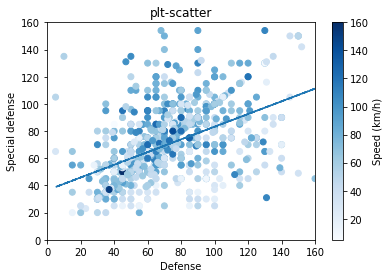

In [100]:
b, m = polyfit(pokemon['defense'], pokemon['special-defense'], 1)
plt.plot(pokemon['defense'], b + m * pokemon['defense'], '--');


plt.scatter(data = pokemon, x = 'defense', y = 'special-defense', c ='speed', alpha =1, cmap='Blues');
plt.colorbar(orientation = 'vertical', fraction =0.15, label ='Speed (km/h)')

plt.xlabel('Defense')
plt.ylabel('Special defense')
plt.title('plt-scatter')
plt.xlim(0,160)
plt.ylim(0,160);

If you have a qualitative variable, you can set different colors for different levels of a categorical variable through the "hue" parameter on seaborn's FacetGrid class.
``` python
g = sb.FacetGrid(data = df, hue = 'cat_var1', size = 5)
g.map(plt.scatter, 'num_var1', 'num_var2')
g.add_legend()
```


When creating the plot, I made the figure size bigger and set axis limits to zoom into the majority of data points. I might want to apply some manual jitter to the data since I suspect there to be a lot of overlapping points. From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.


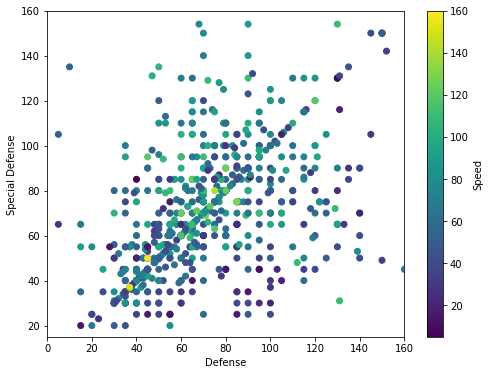

In [44]:
# run this cell to check your work against ours
encodings_solution_1()

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [101]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [ ]:
# YOUR CODE HERE

In [ ]:
# run this cell to check your work against ours
encodings_solution_2()